In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load Dataset
spotify_data = pd.read_csv('/Users/davelotito/Documents/Data/top50.csv',encoding = "ISO-8859-1")

# Inspect Data

In [3]:
# Inspect dataset columns 
spotify_data.columns

Index(['Unnamed: 0', 'Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute',
       'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.',
       'Length.', 'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')

In [4]:
spotify_data.sample(10)

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
49,50,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,95,79,75,-6,7,61,206,21,12,82
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
23,24,Soltera - Remix,Lunay,latin,92,78,80,-4,44,80,266,36,4,91
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
32,33,0.958333333333333,Maluma,reggaeton,96,71,78,-5,9,68,176,22,28,89
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
13,14,Otro Trago - Remix,Sech,panamanian pop,176,79,73,-2,6,76,288,7,20,87
34,35,Never Really Over,Katy Perry,dance pop,100,88,77,-5,32,39,224,19,6,89
28,29,Con Calma,Daddy Yankee,latin,94,86,74,-3,6,66,193,11,6,91
24,25,bad guy (with Justin Bieber),Billie Eilish,electropop,135,45,67,-11,12,68,195,25,30,89


In [5]:
spotify_data.dtypes

Unnamed: 0           int64
Track.Name          object
Artist.Name         object
Genre               object
Beats.Per.Minute     int64
Energy               int64
Danceability         int64
Loudness..dB..       int64
Liveness             int64
Valence.             int64
Length.              int64
Acousticness..       int64
Speechiness.         int64
Popularity           int64
dtype: object

# Clean Data & Columns

In [6]:
# Drop unwanted columns
spotify_data.drop(columns='Unnamed: 0', inplace=True)

In [17]:
# Clean up column names a bit & replace periods with underscores
spotify_data.columns = spotify_data.columns.str.replace('.', '_', regex=False)

In [18]:
spotify_data

,Track_Name,Artist_Name,Genre,Beats_Per_Minute,Energy,Danceability,Loudness__dB__,Liveness,Valence_,Length_,Acousticness__,Speechiness_,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [194]:
spotify_data.sort_values(by='Artist.Name',ascending=True)
spotify_data.drop(columns=['Loudness..dB..'],inplace=True)

In [195]:
spotify_data.head(51)
spotify_data.sort_values(by=['Track.Name','Artist.Name','Genre'],ascending=True,inplace=True)

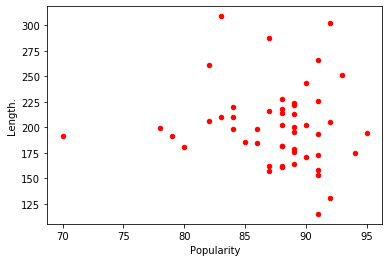

In [197]:
spotify_data.plot(kind='scatter',x='Popularity',y='Length.',color='red')
plt.show()

In [199]:
spotify_data.loc[(spotify_data['Beats.Per.Minute'] >= 75) & (spotify_data['Energy'] == 71 ), ['Beats.Per.Minute', 'Genre']]

,Beats.Per.Minute,Genre
32,96,reggaeton
11,96,dance pop
